In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

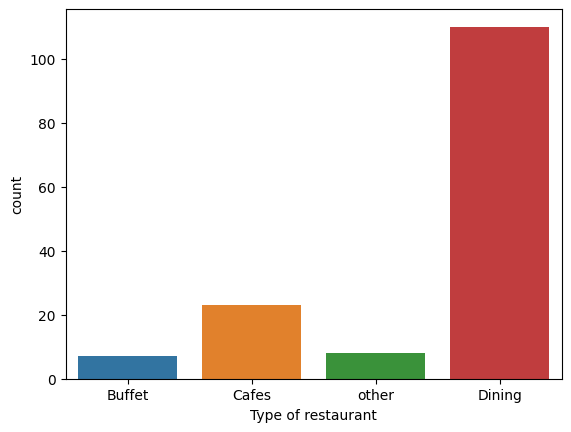

In [6]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'Votes')

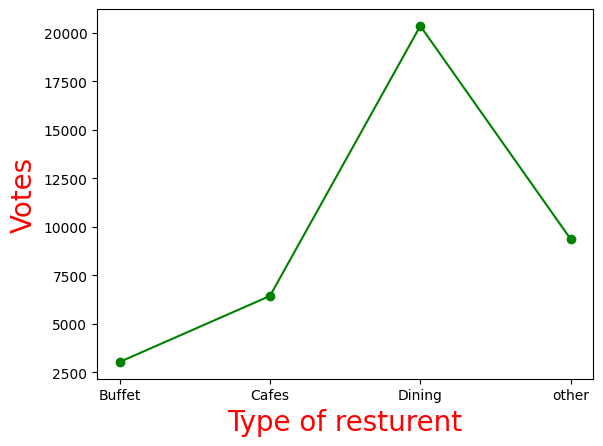

In [11]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c= 'green', marker = "o")
plt.xlabel("Type of resturent", c = "red",  size = 20)
plt.ylabel("Votes",c = "red", size = 20)


In [10]:
df.groupby('listed_in(type)')['votes'].sum().reset_index()

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


In [12]:
# Now we will determine the restaurant’s
# name that received the maximum votes 
# based on a given dataframe.

In [13]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [16]:
df.groupby('name')['votes'].max().sort_values(ascending = False)

name
Empire Restaurant         4884
Meghana Foods             4401
Onesta                    2556
Kabab Magic               1720
Szechuan Dragon           1647
                          ... 
Hotel Andhra Speices         0
Mohitesh Hut Roll            0
Swaada Healthy Kitchen       0
Swathi Cool Point            0
Sunsadm                      0
Name: votes, Length: 145, dtype: int64

In [19]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes,'name']

In [20]:
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

<AxesSubplot:xlabel='online_order', ylabel='count'>

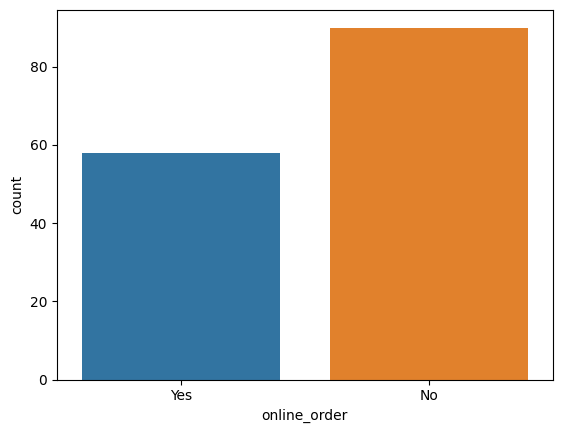

In [22]:
sns.countplot(x = df['online_order'])

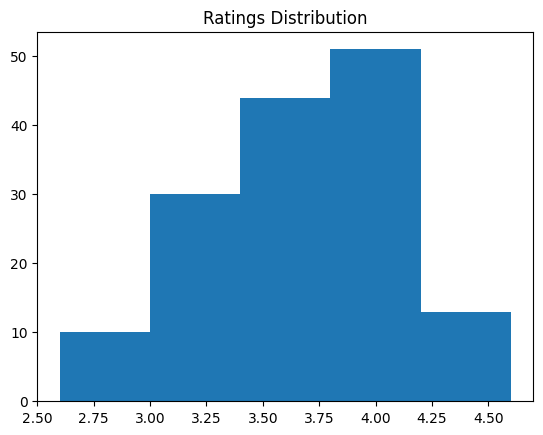

In [23]:
plt.hist(df['rate'], bins = 5)
plt.title('Ratings Distribution')
plt.show()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

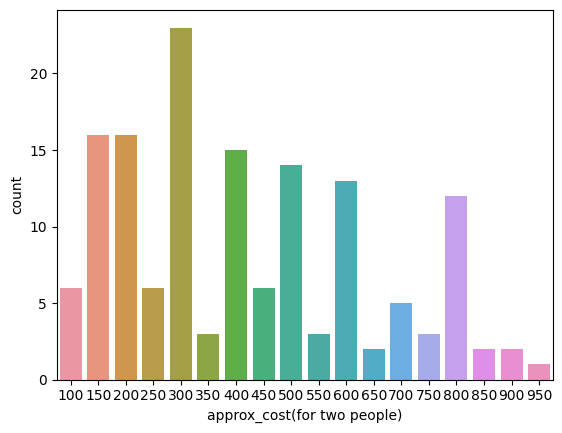

In [24]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

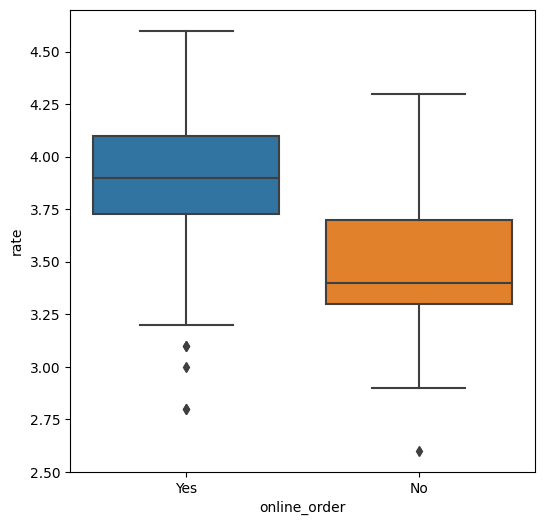

In [28]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

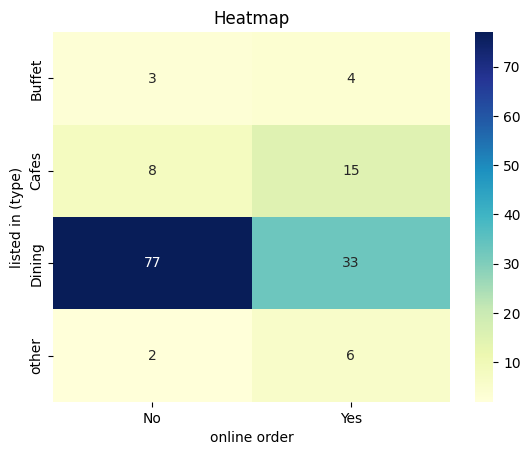

In [30]:
pivot_table = df.pivot_table(index = 'listed_in(type)',  columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title("Heatmap")
plt.xlabel('online order')
plt.ylabel('listed in (type)')
plt.show()
